In [3]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv("C:\\Users\\hrith\\Desktop\\Data_science_ml\\iot_safety_dataset_136789_updated.csv")  # Replace "your_dataset.csv" with the actual file name

# Display the first few rows
df.head()


,humidity,temperature,distance,mq2,mq6,mq135,acc_x,acc_y,acc_z,fall_detected,air_quality_risk
0,59.15,15.00,229.92,5766.57,7714.05,813.31,2.08,0.22,1.93,0,High Risk
1,54.00,39.28,18.59,4440.09,3007.55,407.55,-0.20,-1.74,-1.12,0,Moderate Risk
2,67.24,27.85,266.83,2379.75,4216.47,206.32,1.18,2.09,0.53,1,Moderate Risk
3,65.90,37.17,21.40,2982.46,4214.45,492.78,-1.37,0.41,-1.65,0,Moderate Risk
4,24.50,42.64,247.61,1789.99,580.75,150.89,-0.58,2.09,-1.95,0,Safe


# Data Exploration


In [4]:
# Keep only relevant columns
df_fall = df[['acc_x', 'acc_y', 'acc_z', 'fall_detected']]

# Display basic info
print("Dataset Information:")
print(df_fall.info())

# Check for missing values
print("\nMissing Values:")
print(df_fall.isnull().sum())

# Show first few rows
df_fall.head()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136789 entries, 0 to 136788
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   acc_x          136789 non-null  float64
 1   acc_y          136789 non-null  float64
 2   acc_z          136789 non-null  float64
 3   fall_detected  136789 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 4.2 MB
None

Missing Values:
acc_x            0
acc_y            0
acc_z            0
fall_detected    0
dtype: int64


,acc_x,acc_y,acc_z,fall_detected
0,2.08,0.22,1.93,0
1,-0.20,-1.74,-1.12,0
2,1.18,2.09,0.53,1
3,-1.37,0.41,-1.65,0
4,-0.58,2.09,-1.95,0


# Train-Test Split & Data Preprocessing

In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_fall[['acc_x', 'acc_y', 'acc_z']]
y = df_fall['fall_detected']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (109431, 3), Testing set size: (27358, 3)


# logistic regression

c:\Users\hrith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hrith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hrith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

🔹 Accuracy: 0.6094

🔹 Confusion Matrix:
 [[16671     0]
 [10687     0]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76     16671
           1       0.00      0.00      0.00     10687

    accuracy                           0.61     27358
   macro avg       0.30      0.50      0.38     27358
weighted avg       0.37      0.61      0.46     27358



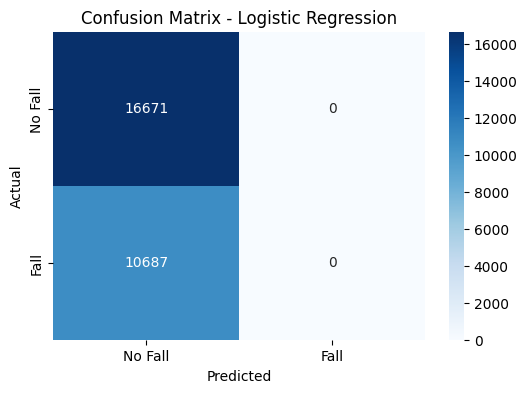

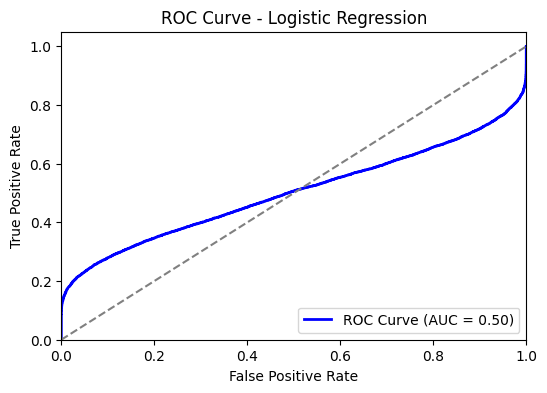

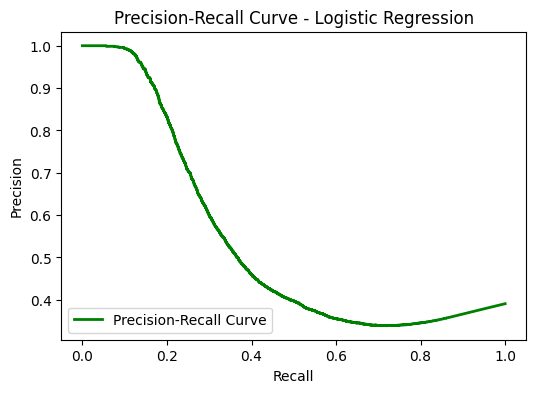

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Classification Report:\n", class_report)

# 📌 1️⃣ **Confusion Matrix Heatmap**
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 📌 2️⃣ **ROC Curve**
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# 📌 3️⃣ **Precision-Recall Curve**
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend(loc="lower left")
plt.show()


# decison tree 

🔹 Accuracy (Decision Tree): 0.8715

🔹 Confusion Matrix:
 [[15648  1023]
 [ 2493  8194]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     16671
           1       0.89      0.77      0.82     10687

    accuracy                           0.87     27358
   macro avg       0.88      0.85      0.86     27358
weighted avg       0.87      0.87      0.87     27358



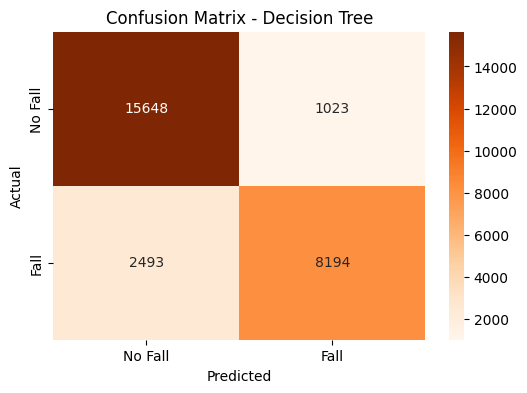

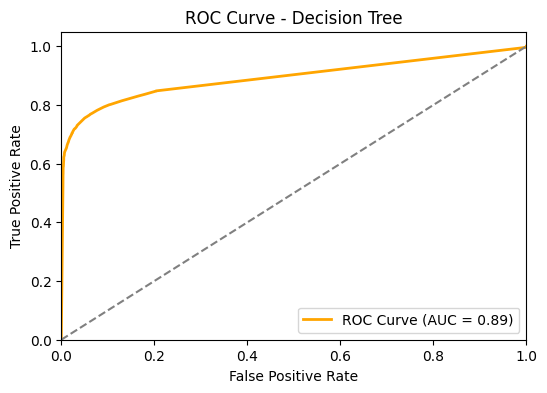

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42)
tree_clf.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_clf.predict(X_test)
y_pred_prob_tree = tree_clf.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

# Print results
print(f"🔹 Accuracy (Decision Tree): {accuracy_tree:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_tree)
print("\n🔹 Classification Report:\n", class_report_tree)

# 📌 1️⃣ **Confusion Matrix Heatmap**
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Oranges', xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# 📌 2️⃣ **ROC Curve**
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(6, 4))
plt.plot(fpr_tree, tpr_tree, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.show()


# random forest

🔹 Accuracy (Random Forest): 0.8748

🔹 Confusion Matrix:
 [[15687   984]
 [ 2442  8245]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     16671
           1       0.89      0.77      0.83     10687

    accuracy                           0.87     27358
   macro avg       0.88      0.86      0.86     27358
weighted avg       0.88      0.87      0.87     27358



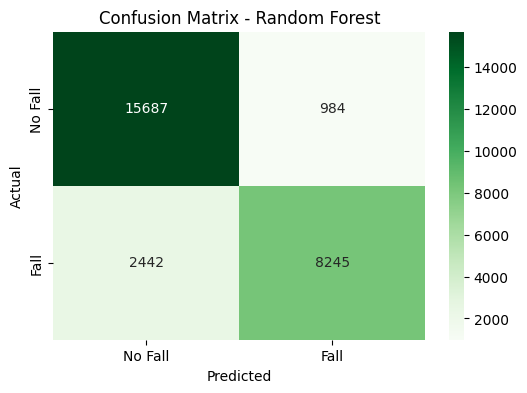

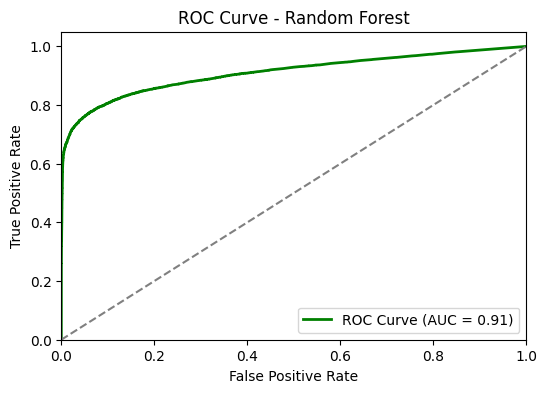

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced", random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)
y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print results
print(f"🔹 Accuracy (Random Forest): {accuracy_rf:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_rf)
print("\n🔹 Classification Report:\n", class_report_rf)

# 📌 1️⃣ **Confusion Matrix Heatmap**
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 📌 2️⃣ **ROC Curve**
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


# xg boost

🔹 Accuracy (XGBoost): 0.8544

🔹 Confusion Matrix:
 [[14814  1857]
 [ 2126  8561]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     16671
           1       0.82      0.80      0.81     10687

    accuracy                           0.85     27358
   macro avg       0.85      0.84      0.85     27358
weighted avg       0.85      0.85      0.85     27358



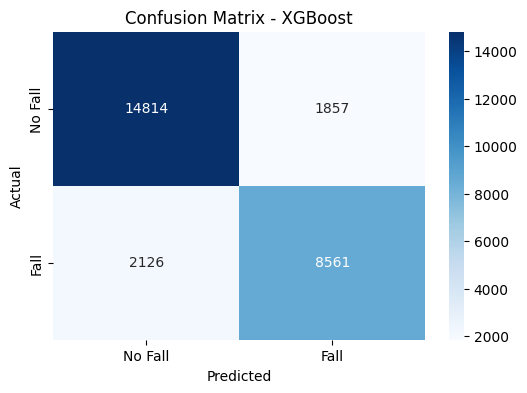

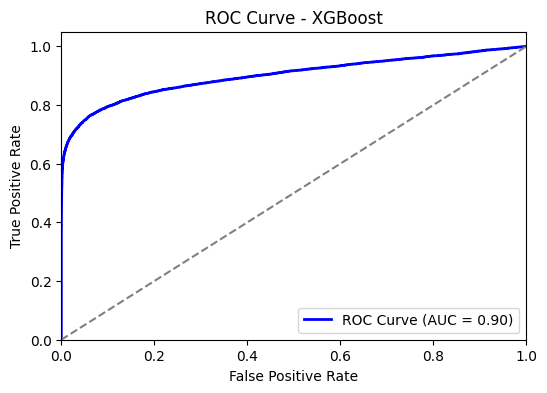

In [9]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_clf = XGBClassifier(n_estimators=100, max_depth=10, scale_pos_weight=len(y_train)/sum(y_train), random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Print results
print(f"🔹 Accuracy (XGBoost): {accuracy_xgb:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_xgb)
print("\n🔹 Classification Report:\n", class_report_xgb)

# 📌 1️⃣ **Confusion Matrix Heatmap**
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# 📌 2️⃣ **ROC Curve**
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()


# feature important xgboost

C:\Users\hrith\AppData\Local\Temp\ipykernel_17204\4082687755.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues")


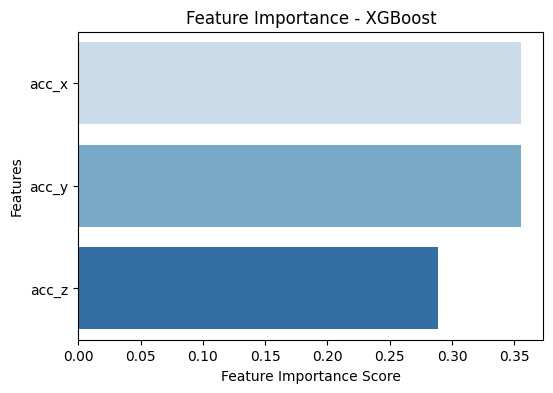

In [10]:
import numpy as np
import pandas as pd

# Extract feature importance from XGBoost
feature_importance = xgb_clf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# 📌 1️⃣ **Plot Feature Importance**
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - XGBoost")
plt.show()


# knn

🔹 Accuracy (KNN): 0.8608

🔹 Confusion Matrix:
 [[15543  1128]
 [ 2681  8006]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     16671
           1       0.88      0.75      0.81     10687

    accuracy                           0.86     27358
   macro avg       0.86      0.84      0.85     27358
weighted avg       0.86      0.86      0.86     27358



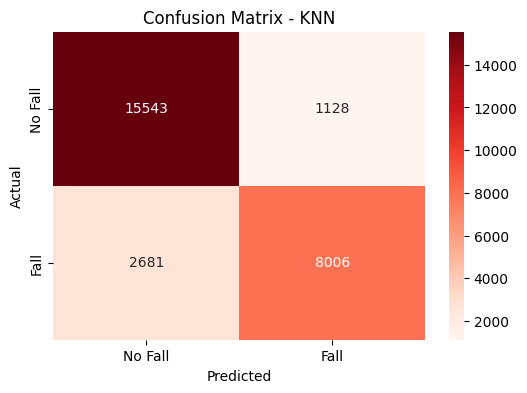

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_clf.predict(X_test)

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f"🔹 Accuracy (KNN): {accuracy_knn:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_knn)
print("\n🔹 Classification Report:\n", class_report_knn)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Reds', xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


# GRADIENT BOOST

🔹 Accuracy (GBM): 0.8755

🔹 Confusion Matrix:
 [[15953   718]
 [ 2688  7999]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90     16671
           1       0.92      0.75      0.82     10687

    accuracy                           0.88     27358
   macro avg       0.89      0.85      0.86     27358
weighted avg       0.88      0.88      0.87     27358



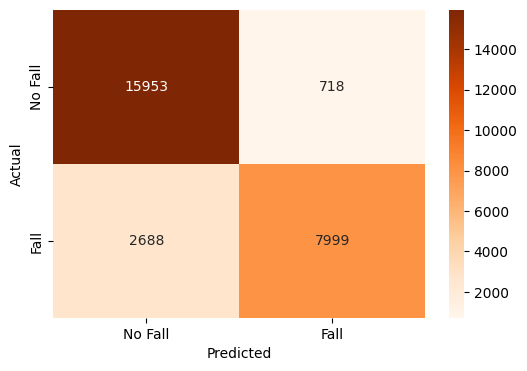

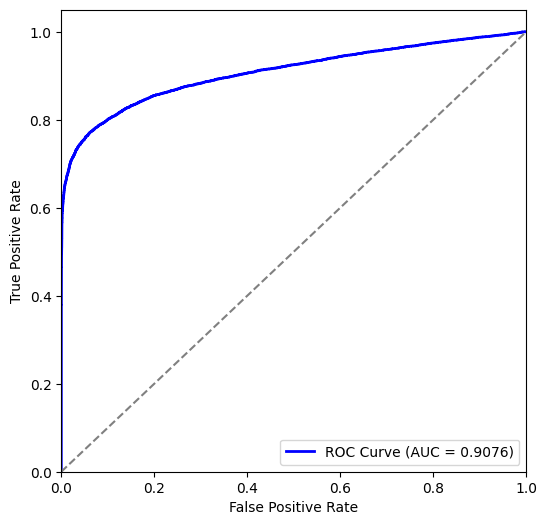

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train GBM
gbm_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
gbm_clf.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm_clf.predict(X_test)
y_prob_gbm = gbm_clf.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Evaluation
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)

print(f"🔹 Accuracy (GBM): {accuracy_gbm:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_gbm)
print("\n🔹 Classification Report:\n", class_report_gbm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Oranges', xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gbm)
roc_auc = roc_auc_score(y_test, y_prob_gbm)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.show()


# LightGBM (LGBM)

[LightGBM] [Info] Number of positive: 42749, number of negative: 66682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 109431, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
🔹 Accuracy (LGBM): 0.8747

🔹 Confusion Matrix:
 [[15621  1050]
 [ 2379  8308]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     16671
           1       0.89      0.78      0.83     10687

    accuracy                           0.87     27358
   macro avg       0.88      0.86      0.87     27358
weighted avg       0.88      0.87      0.87     27358



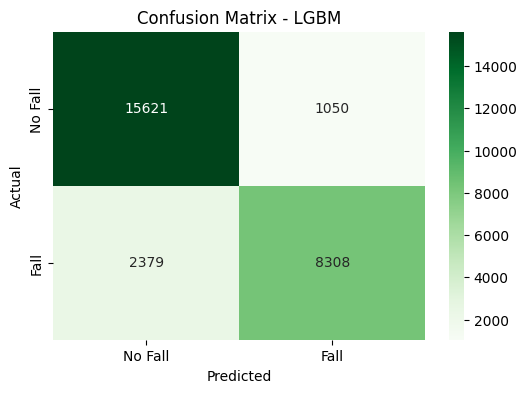

In [13]:
from lightgbm import LGBMClassifier

# Initialize and train LGBM
lgbm_clf = LGBMClassifier(n_estimators=100, max_depth=10, class_weight="balanced", random_state=42)
lgbm_clf.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm_clf.predict(X_test)

# Evaluation
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
class_report_lgbm = classification_report(y_test, y_pred_lgbm)

print(f"🔹 Accuracy (LGBM): {accuracy_lgbm:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_lgbm)
print("\n🔹 Classification Report:\n", class_report_lgbm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Greens', xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LGBM")
plt.show()


# Neural Network (MLP - Multi-Layer Perceptron)

🔹 Accuracy (MLP - Neural Network): 0.8775

🔹 Confusion Matrix:
 [[15901   770]
 [ 2582  8105]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     16671
           1       0.91      0.76      0.83     10687

    accuracy                           0.88     27358
   macro avg       0.89      0.86      0.87     27358
weighted avg       0.88      0.88      0.87     27358



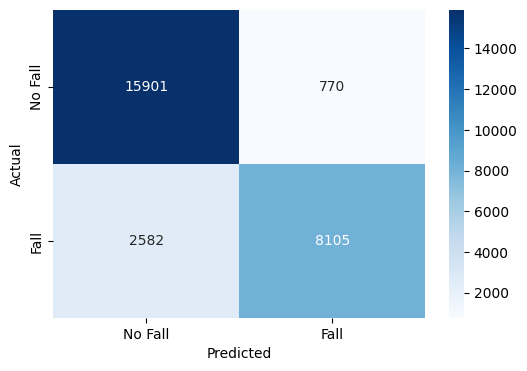

In [14]:
from sklearn.neural_network import MLPClassifier

# Initialize and train MLP
mlp_clf = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, alpha=0.001, random_state=42)
mlp_clf.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluation
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)

print(f"🔹 Accuracy (MLP - Neural Network): {accuracy_mlp:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_mlp)
print("\n🔹 Classification Report:\n", class_report_mlp)

# 📌 1️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


# catboostclassifier

🔹 Accuracy (CatBoost): 0.8777

🔹 Confusion Matrix:
 [[15967   704]
 [ 2641  8046]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     16671
           1       0.92      0.75      0.83     10687

    accuracy                           0.88     27358
   macro avg       0.89      0.86      0.87     27358
weighted avg       0.88      0.88      0.87     27358



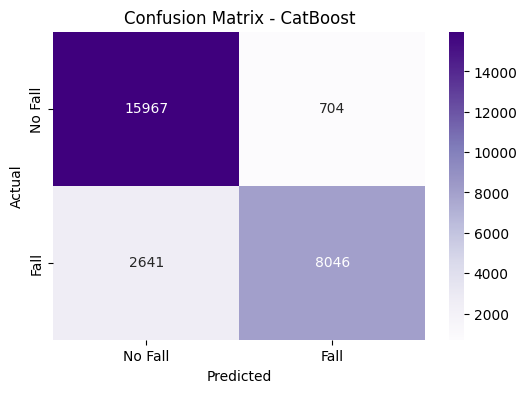

In [15]:
from catboost import CatBoostClassifier

# Initialize and train CatBoost
catboost_clf = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, verbose=0)
catboost_clf.fit(X_train, y_train)

# Predictions
y_pred_catboost = catboost_clf.predict(X_test)

# Evaluation
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
class_report_catboost = classification_report(y_test, y_pred_catboost)

print(f"🔹 Accuracy (CatBoost): {accuracy_catboost:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_catboost)
print("\n🔹 Classification Report:\n", class_report_catboost)

# 📌 1️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_catboost, annot=True, fmt='d', cmap='Purples', xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()
